## Circles data 

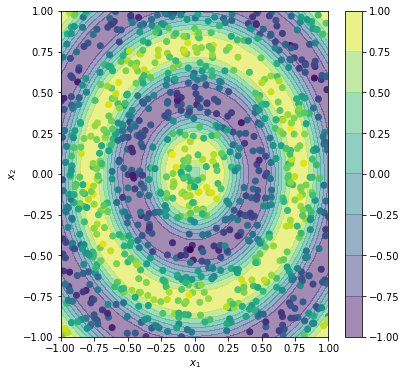

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def circles(X):
    y = np.sin(10*np.sqrt(X[:,0] ** 2 + X[:,1] ** 2))
    return y

def generate_data(y_func,N=1000):
    X = 2*np.random.rand(N,2)-1
    y = y_func(X) + 0.25* np.random.randn(N)
    return X,y

def draw_contours(y_func):
    plt.figure(figsize=(6,6))
    X1,X2 = np.meshgrid(np.linspace(-1, 1, 30),np.linspace(-1, 1, 30))
    Y = y_func(np.c_[X1.ravel(),X2.ravel()]).reshape(X1.shape)
    plt.contourf(X1,X2,Y,alpha=0.5)
    c = plt.colorbar()
    plt.xlabel('$x_{1}$')
    plt.ylabel('$x_{2}$')
    return None

X,y = generate_data(circles)
f = draw_contours(circles)
s = plt.scatter(X[:,0],X[:,1],c=y) 

In [2]:
def forward_pass(X,Ws,bs):
    
    Zs = []
    Hs = []
    
    H = X.T
    
    for i in range(len(Ws)):
        
        W = Ws[i]
        b = bs[i]
        
        Z = np.matmul(W,H) + b
        
        H = Z if i+1 == len(Ws) else Z*(Z>0)
        
        Zs.append(Z)
        Hs.append(H)      
    
    return Zs, Hs

In [3]:
def backward_pass(X,y,Zs,Hs,Ws,bs):
    
    dWs = []
    dbs = []
    
    dH = Hs[-1] - y 
    
    for i in range(len(Ws))[::-1]:
        
        Z = Zs[i]
        W = Ws[i]
        H_back = Hs[i-1] if i>0 else X.T
        
        dZ = dH if i+1 == len(Ws) else dH*(Z>0)
        
        dW = np.matmul(dZ,H_back.T)
        db = np.matmul(dZ,np.ones((dZ.shape[1],1)))
        
        dH = np.matmul(W.T,dZ)
        
        dWs.append(dW)
        dbs.append(db)
    
    return dWs[::-1], dbs[::-1]

In [4]:
def predict(X,Ws,bs):
    Zs,Hs = forward_pass(X,Ws,bs)
    return Hs[-1].flatten()

In [5]:
ns = [2,16,1]

bs = [np.random.randn(ns[l],1)  for l in range(1,len(ns))]
Ws = [np.random.randn(ns[l],ns[l-1])  for l in range(1,len(ns))]

alpha = 1e-4

for step in range(50000):
    
    Zs,Hs = forward_pass(X,Ws,bs)
    
    dWs, dbs = backward_pass(X,y,Zs,Hs,Ws,bs)
    
    for i in range(len(Ws)):
        
        Ws[i] -= alpha * dWs[i]
        bs[i] -= alpha * dbs[i]

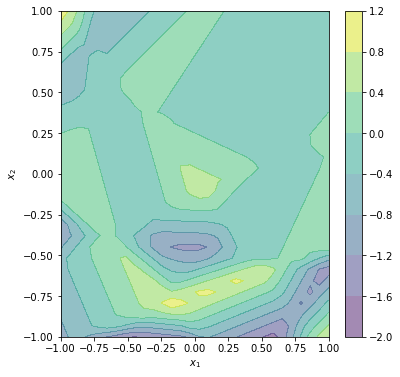

In [37]:
f = draw_contours(lambda X: predict(X,Ws,bs))